In [1]:
#!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as msng

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import normalize,scale

#Classification
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [3]:
def regression_(x,y):
    
    lr=LinearRegression()
    r=Ridge()
    l=Lasso()
    e=ElasticNet()
    kn=KNeighborsRegressor()
    et=ExtraTreeRegressor()
    gb=GradientBoostingRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
       
    algos=[lr,r,l,e,kn,et,gb,dt,xgb]
    algos_names=['LinearRegressor','Ridge','Lasso','ElasticNet','KNeighbors','ExtraTree','GradientBoosting','DecisionTree','XGB']
    
    #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    r_score=[]
    mse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_square','MSE','MAE'],index=algos_names)
    
    for algo in algos:
        pred=algo.fit(x,y).predict(x)
        r_score.append(r2_score(y,pred))
        mse.append(mean_squared_error(y,pred)**.5)
        mae.append(mean_absolute_error(y,pred))
    
    
    result.R_square=r_score
    result.MSE=mse
    result.MAE=mae
    
    return result.sort_values('R_square',ascending=False)

In [4]:
def classification_(train,y):
    
    
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()

    x=train
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    algos=[g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name=['Gaussian','Bernoulli','KNeigbors','SVC','DecisionTree','LogisticRegr','GradientBoosting','Multinominal','RandomForest','AdaBoost']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        predict=i.fit(x_train,y_train).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict))
        recall.append(recall_score(y_test,predict))
        f1.append(f1_score(y_test,predict))
        

    
    
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    
    return result.sort_values('f1_Score',ascending=False)
    
    
    

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5074-7CFC

 Directory of C:\Users\Ahmet\Desktop\AI General\Projects\P1-P3 Loan Prediction\LoanPrediction

28.07.2022  12:37    <DIR>          .
28.07.2022  12:37    <DIR>          ..
28.07.2022  10:31    <DIR>          .ipynb_checkpoints
28.07.2022  12:37           911.921 LOAN Prediction(kredi vermeli mi vermemelimi.ipynb
13.11.2019  21:42           130.260 LoansTraining data dictionary.docx
21.11.2019  01:53        47.630.611 LoansTrainingSet.csv
28.07.2022  12:20                 0 logs.log
               4 File(s)     48.672.792 bytes
               3 Dir(s)  84.282.867.712 bytes free


# READ THE DATA

In [6]:
df=pd.read_csv('LoansTrainingSet.csv')

# EXPLORATORY DATA ANALYSİS

In [7]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0


In [8]:
df.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0


In [9]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [11]:
df.isnull().sum().sort_values(ascending=False)

Months since last delinquent    140383
Credit Score                     61676
Annual Income                    61676
Years in current job             11476
Bankruptcies                       529
Tax Liens                           23
Years of Credit History              0
Maximum Open Credit                  0
Current Credit Balance               0
Number of Credit Problems            0
Number of Open Accounts              0
Loan ID                              0
Monthly Debt                         0
Customer ID                          0
Home Ownership                       0
Term                                 0
Current Loan Amount                  0
Loan Status                          0
Purpose                              0
dtype: int64

In [12]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


# DATA PREPARATİON

<AxesSubplot:>

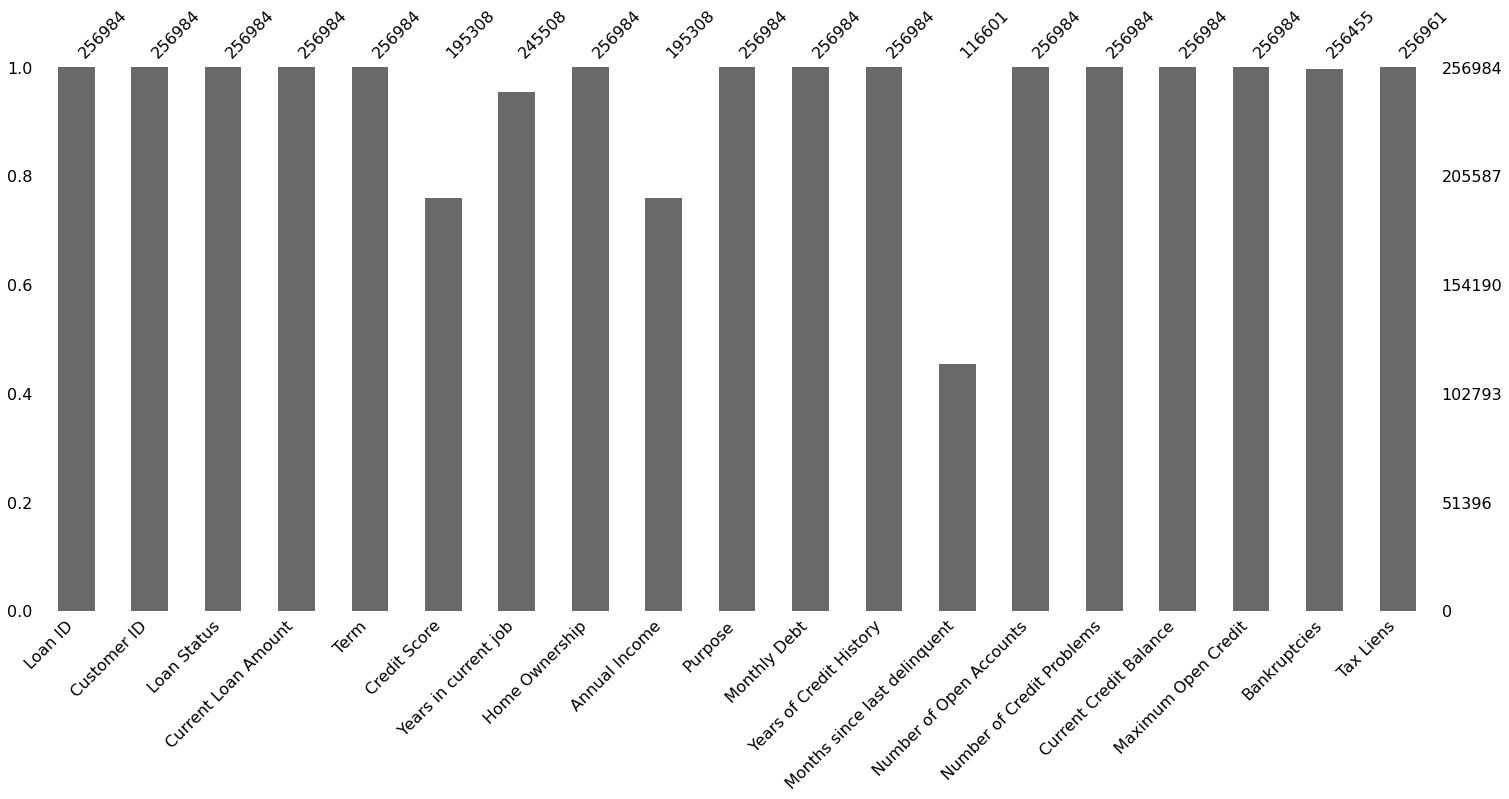

In [13]:
msng.bar(df) # This code generates a graph according to the ratio of full data to all data.

<AxesSubplot:>

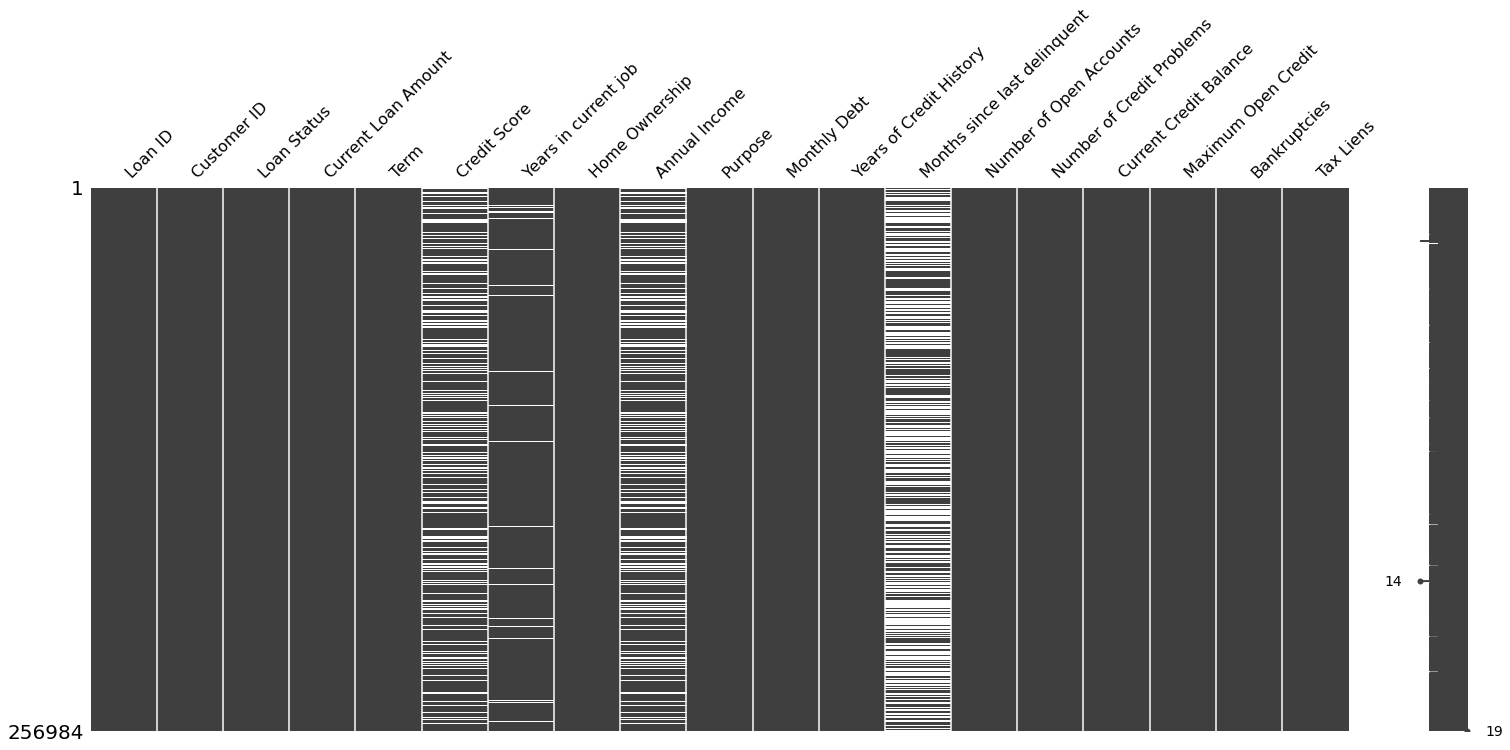

In [14]:
msng.matrix(df) # graph of the distribution of blank data in all data

In [15]:
df.drop_duplicates(subset=['Loan ID','Customer ID'],inplace=True)

In [16]:
#df['Current Loan Amount']=df['Current Loan Amount'].apply(lambda x : df['Current Loan Amount'].median() if x >=99999999 else x)

In [17]:
df['Monthly Debt']=df['Monthly Debt'].apply(lambda x: x.replace('$',''))
df['Monthly Debt']=df['Monthly Debt'].apply(lambda x : x.replace('.',''))
df['Monthly Debt']=df['Monthly Debt'].apply(lambda x : x.replace(',',''))
df['Monthly Debt']=df['Monthly Debt'].astype('int64')
df['Credit Score']=df['Credit Score'].apply(lambda x:x/10 if x>800 else x)
#kredi puanı 0-800 arası olması gerekiyor bu aralığın dışında kalanları atıyoruz
df['Credit Score']=df['Credit Score'].fillna(df['Credit Score'].median())



In [18]:
df['Years in current job']=df['Years in current job'].str.replace('years',' ')
df['Years in current job']=df['Years in current job'].str.replace('+',' ')
df['Years in current job']=df['Years in current job'].str.replace(' year',' ')
df['Years in current job']=df['Years in current job'].str.replace('<',' ')

#df['Years in current job']=df['Years in current job'].str.extract(r'(\d+(\.\d+)?)') 


In [19]:
df['Years in current job']=df['Years in current job'].fillna(0)
df['Years in current job'].astype(int)

0         10
1          4
2         10
3         10
4          4
          ..
256977    10
256979     2
256980    10
256981     9
256983    10
Name: Years in current job, Length: 215700, dtype: int32

In [20]:
df['Term'].unique()
# it will have made money with better interest for the long term bank so I will assign a value of 1 to the short term 0

array(['Short Term', 'Long Term'], dtype=object)

In [21]:
df['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [22]:
df['Loan Status'].unique()
#Charged Off :0
# Fully Paid : 1 
# şeklinde bir ayrım yapabilirim çünkü biri bankanın isteği üzerine iyi diğeri kötü

array(['Fully Paid', 'Charged Off'], dtype=object)

In [23]:
#df['Term']= df['Term'].apply(lambda x : x.replace('Short Term','0'))
#df['Term']= df['Term'].apply(lambda x : x.replace('Long Term','1'))
df['Term']=df['Term'].astype('category')
#object olan sütunları category ye çevirirsen ram de daha az yer kaplar

In [24]:
df['Term'].unique()


['Short Term', 'Long Term']
Categories (2, object): ['Long Term', 'Short Term']

In [25]:
df['Home Ownership'].replace({'Home Mortgage':'Mortgage','HaveMortgage':'Mortgage'},inplace=True)

In [26]:
df['Home Ownership'].unique()

array(['Mortgage', 'Own Home', 'Rent'], dtype=object)

In [27]:
#df['Loan Status']= df['Loan Status'].apply(lambda x : x.replace('Charged Off','0'))
#df['Loan Status']= df['Loan Status'].apply(lambda x : x.replace('Fully Paid','1'))
df['Loan Status']=df['Loan Status'].replace({'Fully Paid':1,'Charged Off':0})# one linear


In [28]:
df['Loan Status'].unique()


array([1, 0], dtype=int64)

In [29]:
df['Loan Status'].describe()

count    215700.000000
mean          0.816834
std           0.386804
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Loan Status, dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Loan ID                       215700 non-null  object  
 1   Customer ID                   215700 non-null  object  
 2   Loan Status                   215700 non-null  int64   
 3   Current Loan Amount           215700 non-null  int64   
 4   Term                          215700 non-null  category
 5   Credit Score                  215700 non-null  float64 
 6   Years in current job          215700 non-null  object  
 7   Home Ownership                215700 non-null  object  
 8   Annual Income                 160692 non-null  float64 
 9   Purpose                       215700 non-null  object  
 10  Monthly Debt                  215700 non-null  int64   
 11  Years of Credit History       215700 non-null  float64 
 12  Months since last delinquent  

Positive examples= 0
Negative examples= 0


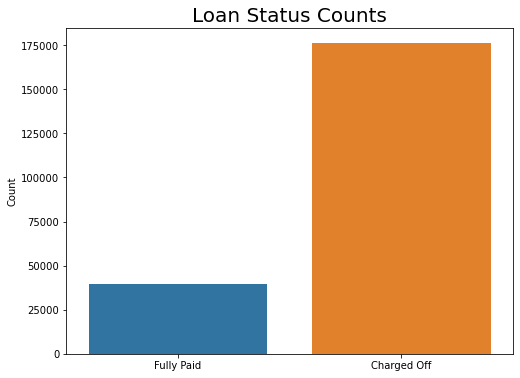

In [31]:
pos = df[df["Loan Status"] == 'Fully Paid'].shape[0]
neg = df[df["Loan Status"] == 'Charged Off'].shape[0]
print(f"Positive examples= {pos}")
print(f"Negative examples= {neg}")

plt.figure(figsize=(8, 6))
sns.countplot(df["Loan Status"])
plt.xticks((0, 1), ["Fully Paid", "Charged Off"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Loan Status Counts", y=1, fontdict={"fontsize": 20});

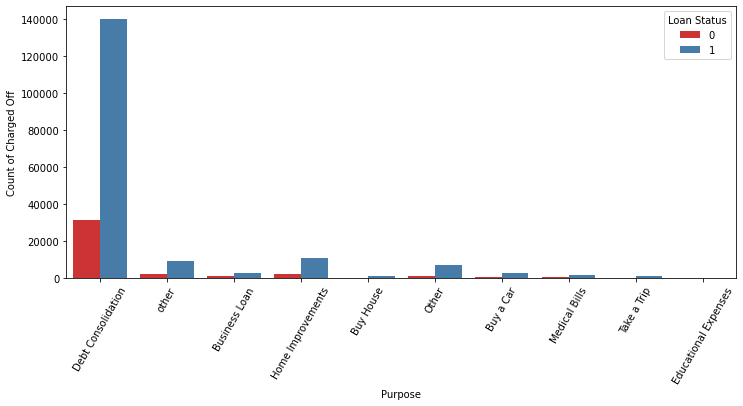

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x='Purpose',hue=df["Loan Status"],data=df,palette='Set1')
plt.ylabel("Count of Charged Off")
plt.xticks(rotation=60);

In [33]:
df['Purpose']=df['Purpose'].str.replace('other','Other')

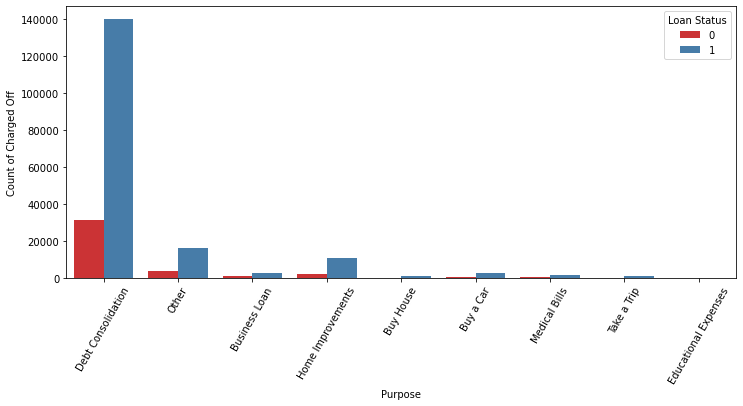

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(x='Purpose',hue=df["Loan Status"],data=df,palette='Set1')
plt.ylabel("Count of Charged Off")
plt.xticks(rotation=60);

In [35]:
df['Maximum Open Credit']=df['Maximum Open Credit'].str.extract(r'(d\+)',expand=False).astype(float)

In [36]:
df['Maximum Open Credit']=df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median())


In [37]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741.0,10,Mortgage,33694.0,Debt Consolidation,58403,12.3,41.0,10,0,6760,NaN,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734.0,4,Mortgage,42269.0,Other,110604,26.3,NaN,17,0,6262,NaN,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747.0,10,Mortgage,90126.0,Debt Consolidation,132185,28.8,NaN,5,0,20967,NaN,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747.0,10,Own Home,38072.0,Debt Consolidation,75192,26.2,NaN,9,0,22529,NaN,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746.0,4,Rent,50025.0,Debt Consolidation,35518,11.5,NaN,12,0,17391,NaN,0.0,0.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Loan ID                       215700 non-null  object  
 1   Customer ID                   215700 non-null  object  
 2   Loan Status                   215700 non-null  int64   
 3   Current Loan Amount           215700 non-null  int64   
 4   Term                          215700 non-null  category
 5   Credit Score                  215700 non-null  float64 
 6   Years in current job          215700 non-null  object  
 7   Home Ownership                215700 non-null  object  
 8   Annual Income                 160692 non-null  float64 
 9   Purpose                       215700 non-null  object  
 10  Monthly Debt                  215700 non-null  int64   
 11  Years of Credit History       215700 non-null  float64 
 12  Months since last delinquent  

In [39]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job                 0
Home Ownership                       0
Annual Income                    55008
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    118262
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit             215700
Bankruptcies                       452
Tax Liens                           22
dtype: int64

In [40]:
#df['Bankruptcies'].fillna(df['Bankruptcies'].median(),inplace=True)
df['Bankruptcies']=df['Bankruptcies'].fillna(df['Bankruptcies'].median())
df['Tax Liens']=df['Tax Liens'].fillna(df['Tax Liens'].median())
#df['Tax Liens'].fillna(df['Tax Liens'].median(),inplace=True)

<AxesSubplot:xlabel='Bankruptcies', ylabel='count'>

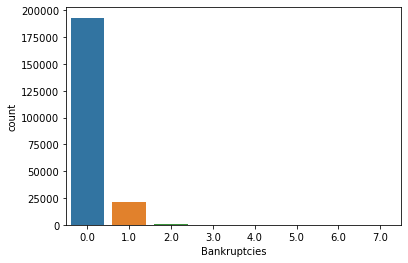

In [41]:
sns.countplot(df["Bankruptcies"])

In [42]:
df=df.drop(columns=['Months since last delinquent','Maximum Open Credit'],axis=1)


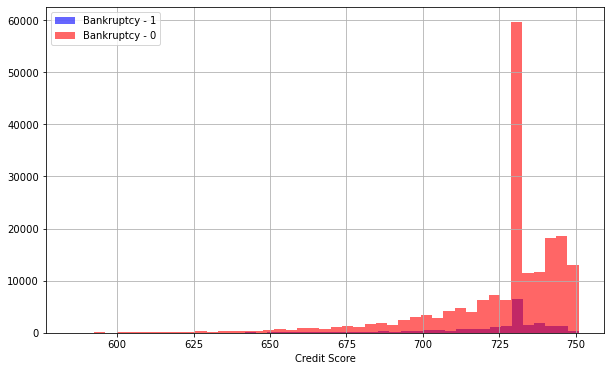

In [43]:
plt.figure(figsize=(10,6))
df[df['Bankruptcies']==1]['Credit Score'].hist(bins=45,color='blue',label='Bankruptcy - 1',alpha=0.6)
df[df['Bankruptcies']==0]['Credit Score'].hist(bins=45,color='red',label='Bankruptcy - 0',alpha=0.6)
plt.xlabel("Credit Score")
plt.legend();

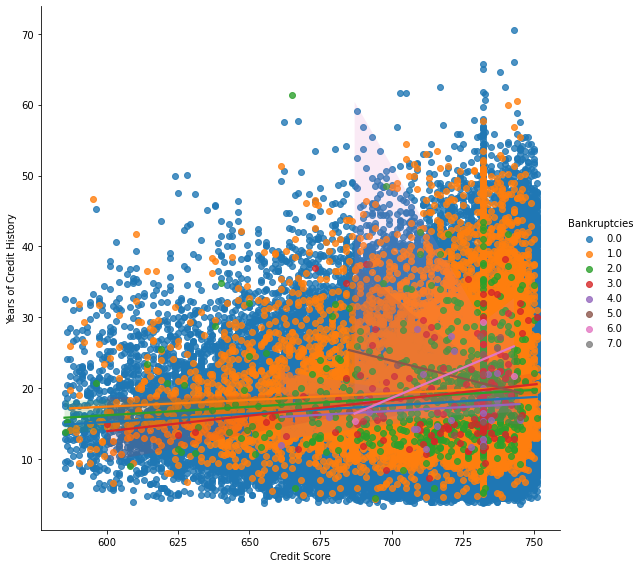

In [44]:
sns.lmplot(x='Credit Score',y='Years of Credit History',data=df,hue='Bankruptcies',height=8)

<AxesSubplot:>

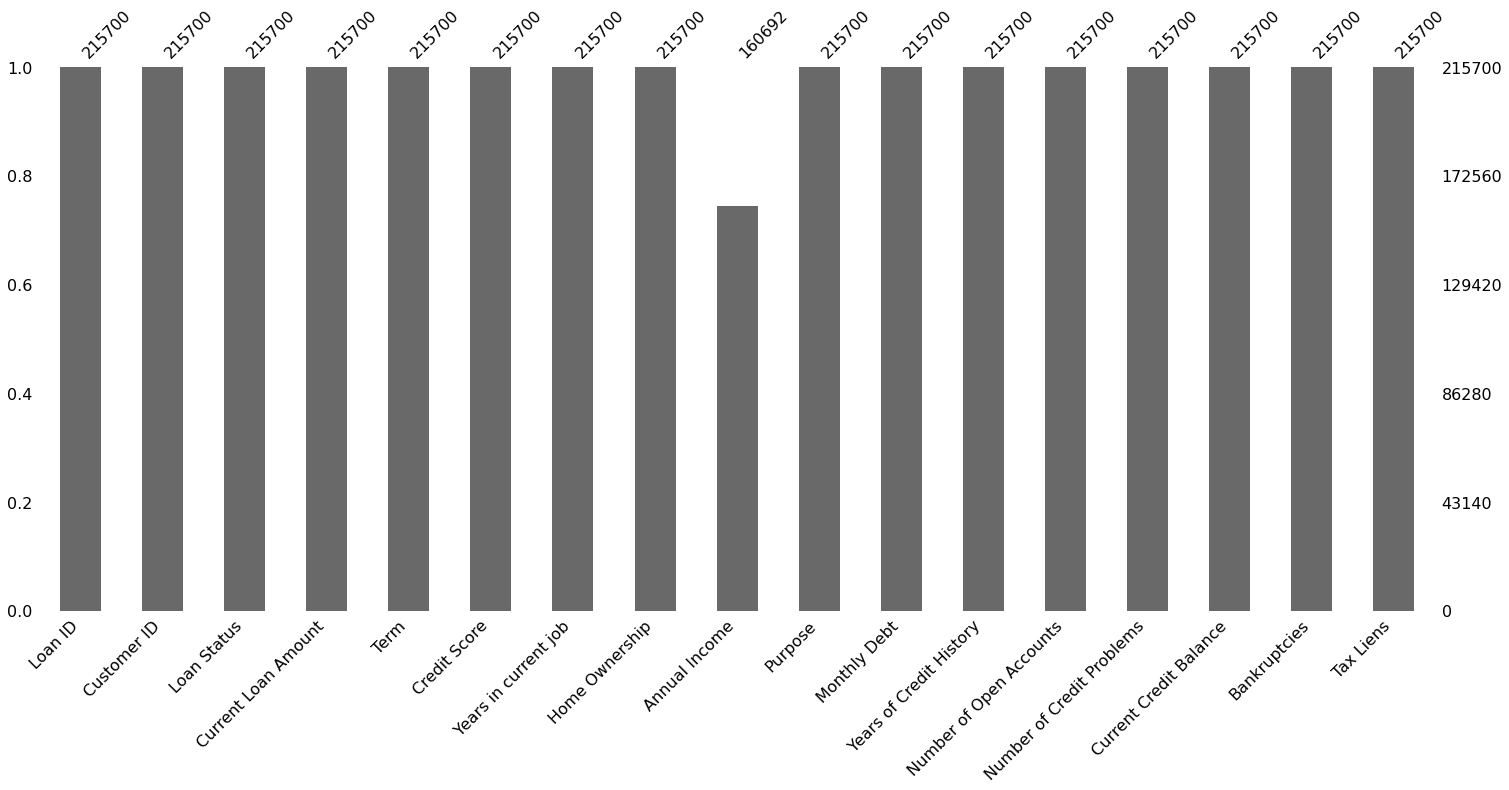

In [45]:
msng.bar(df)

<AxesSubplot:>

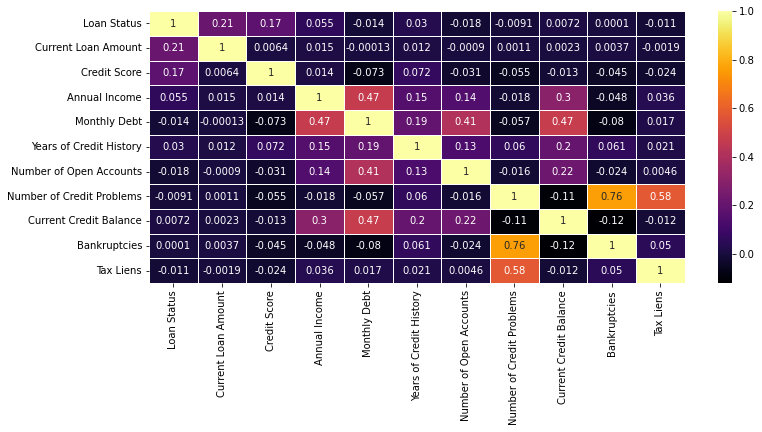

In [46]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap='inferno',linewidths=1)

 # &MODELİNG&

### REGRESSİON

In [48]:
df['Annual Income'].isnull().sum()

55008

In [49]:
abs(df.corr()['Annual Income']).sort_values(ascending=False)


Annual Income                1.000000
Monthly Debt                 0.466860
Current Credit Balance       0.303590
Years of Credit History      0.154597
Number of Open Accounts      0.144506
Loan Status                  0.055320
Bankruptcies                 0.047816
Tax Liens                    0.035591
Number of Credit Problems    0.018045
Current Loan Amount          0.015076
Credit Score                 0.013608
Name: Annual Income, dtype: float64

In [50]:
missing=df[df['Annual Income'].isnull()]
filled=df[df['Annual Income'].notnull()]

In [51]:
missing.shape,filled.shape

((55008, 17), (160692, 17))

In [52]:
abs(filled.corr()['Annual Income'].sort_values(ascending=False))

Annual Income                1.000000
Monthly Debt                 0.466860
Current Credit Balance       0.303590
Years of Credit History      0.154597
Number of Open Accounts      0.144506
Loan Status                  0.055320
Tax Liens                    0.035591
Current Loan Amount          0.015076
Credit Score                 0.013608
Number of Credit Problems    0.018045
Bankruptcies                 0.047816
Name: Annual Income, dtype: float64

In [53]:
y=filled['Annual Income']
x=filled[['Monthly Debt','Current Credit Balance']]

In [54]:
regression_(x,y)

,R_square,MSE,MAE
ExtraTree,0.999642,1100.822120,26.469593
DecisionTree,0.999642,1100.822120,26.469593
XGB,0.529879,39907.283641,22814.568377
KNeighbors,0.386300,45595.872050,21588.425016
GradientBoosting,0.308119,48413.132657,23497.763665
Lasso,0.226402,51192.379784,23987.874207
ElasticNet,0.226402,51192.379784,23987.874206
LinearRegressor,0.226402,51192.379784,23987.874206
Ridge,0.226402,51192.379784,23987.874206


In [55]:
del missing['Annual Income']


In [56]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741.0,10,Mortgage,33694.0,Debt Consolidation,58403,12.3,10,0,6760,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734.0,4,Mortgage,42269.0,Other,110604,26.3,17,0,6262,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747.0,10,Mortgage,90126.0,Debt Consolidation,132185,28.8,5,0,20967,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747.0,10,Own Home,38072.0,Debt Consolidation,75192,26.2,9,0,22529,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746.0,4,Rent,50025.0,Debt Consolidation,35518,11.5,12,0,17391,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256977,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,0,11953,Short Term,717.0,10,Mortgage,39844.0,Debt Consolidation,98282,11.7,9,1,4176,1.0,0.0
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,1,3911,Short Term,732.0,2,Rent,NaN,Debt Consolidation,170658,19.9,16,0,43992,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,1,5078,Short Term,737.0,10,Own Home,77186.0,Debt Consolidation,137647,19.1,9,0,1717,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,0,12116,Short Term,746.0,9,Mortgage,52504.0,Debt Consolidation,29796,15.1,8,0,3315,0.0,0.0


In [57]:
et=ExtraTreeRegressor()
pred=et.fit(x,y).predict(missing[['Monthly Debt','Current Credit Balance']])

In [58]:
missing.loc[:,'Annual Income']=pred

In [59]:
df=missing.append(filled)

In [60]:
df.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Bankruptcies                 0
Tax Liens                    0
Annual Income                0
dtype: int64

In [61]:
df.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Bankruptcies                 0
Tax Liens                    0
Annual Income                0
dtype: int64

In [62]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Annual Income
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,1,10036,Short Term,732.0,5,Rent,Debt Consolidation,38636,17.7,7,0,11970,0.0,0.0,41702.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,0,17980,Short Term,732.0,1,Own Home,Debt Consolidation,59750,9.9,7,0,6817,0.0,0.0,35692.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,0,16929,Long Term,732.0,3,Mortgage,Debt Consolidation,74570,14.9,10,0,28513,0.0,0.0,84626.0
22,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,1,7228,Short Term,732.0,3,Mortgage,Debt Consolidation,43956,17.8,13,1,8488,1.0,0.0,46089.0
26,0004d002-a494-4f8a-a528-a6d513812701,4722d542-6684-431c-afb6-ba2e847f1098,1,4612,Short Term,732.0,10,Rent,Debt Consolidation,26227,14.0,4,0,8919,0.0,0.0,28548.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256975,fffe5140-8725-4fd1-b3bf-9e59cb7834eb,df856c29-ce44-4df7-94a6-bd758a1c1332,0,34710,Short Term,700.0,9,Rent,Business Loan,4711,34.0,3,0,2590,0.0,0.0,148755.0
256977,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,0,11953,Short Term,717.0,10,Mortgage,Debt Consolidation,98282,11.7,9,1,4176,1.0,0.0,39844.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,1,5078,Short Term,737.0,10,Own Home,Debt Consolidation,137647,19.1,9,0,1717,0.0,0.0,77186.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,0,12116,Short Term,746.0,9,Mortgage,Debt Consolidation,29796,15.1,8,0,3315,0.0,0.0,52504.0


### CLASSİFİCATİON

In [63]:
df['Term'].unique()


['Short Term', 'Long Term']
Categories (2, object): ['Long Term', 'Short Term']

In [64]:
df['Home Ownership'].value_counts()


Mortgage    106987
Rent         89619
Own Home     19094
Name: Home Ownership, dtype: int64

In [65]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Annual Income
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,1,10036,Short Term,732.0,5,Rent,Debt Consolidation,38636,17.7,7,0,11970,0.0,0.0,41702.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,0,17980,Short Term,732.0,1,Own Home,Debt Consolidation,59750,9.9,7,0,6817,0.0,0.0,35692.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,0,16929,Long Term,732.0,3,Mortgage,Debt Consolidation,74570,14.9,10,0,28513,0.0,0.0,84626.0
22,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,1,7228,Short Term,732.0,3,Mortgage,Debt Consolidation,43956,17.8,13,1,8488,1.0,0.0,46089.0
26,0004d002-a494-4f8a-a528-a6d513812701,4722d542-6684-431c-afb6-ba2e847f1098,1,4612,Short Term,732.0,10,Rent,Debt Consolidation,26227,14.0,4,0,8919,0.0,0.0,28548.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256975,fffe5140-8725-4fd1-b3bf-9e59cb7834eb,df856c29-ce44-4df7-94a6-bd758a1c1332,0,34710,Short Term,700.0,9,Rent,Business Loan,4711,34.0,3,0,2590,0.0,0.0,148755.0
256977,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,0,11953,Short Term,717.0,10,Mortgage,Debt Consolidation,98282,11.7,9,1,4176,1.0,0.0,39844.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,1,5078,Short Term,737.0,10,Own Home,Debt Consolidation,137647,19.1,9,0,1717,0.0,0.0,77186.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,0,12116,Short Term,746.0,9,Mortgage,Debt Consolidation,29796,15.1,8,0,3315,0.0,0.0,52504.0


In [66]:
df=df.drop(columns=['Loan ID','Customer ID','Years in current job','Monthly Debt','Purpose'],axis=1)

In [67]:
y=df['Loan Status']
x=df.drop('Loan Status',axis=1)
x=pd.get_dummies(x,drop_first=True)

In [68]:
df.groupby('Term')['Loan Status'].value_counts()


Term        Loan Status
Long Term   1               34619
            0               14558
Short Term  1              141572
            0               24951
Name: Loan Status, dtype: int64

In [69]:
df['Home Ownership'].value_counts()


Mortgage    106987
Rent         89619
Own Home     19094
Name: Home Ownership, dtype: int64

In [70]:
classification_(x,y)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
GradientBoosting,0.819866,0.822866,0.993825,0.900301
Bernoulli,0.818382,0.818382,1.000000,0.900121
SVC,0.818382,0.818382,1.000000,0.900121
LogisticRegr,0.818382,0.818382,1.000000,0.900121
AdaBoost,0.819147,0.823405,0.991701,0.899751
RandomForest,0.813584,0.826230,0.977878,0.895680
KNeigbors,0.784029,0.823749,0.936468,0.876500
DecisionTree,0.727863,0.840132,0.824331,0.832156
Gaussian,0.346036,0.997475,0.201416,0.335156
Multinominal,0.344182,1.000000,0.198640,0.331443
